Saving insurance_data.csv to insurance_data (1).csv
   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

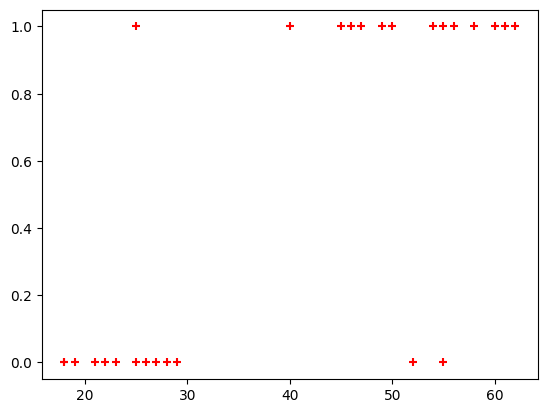

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
# Upload the CSV file
uploaded = files.upload()
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(df.head())


plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

Saving iris (1).csv to iris (1) (1).csv
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


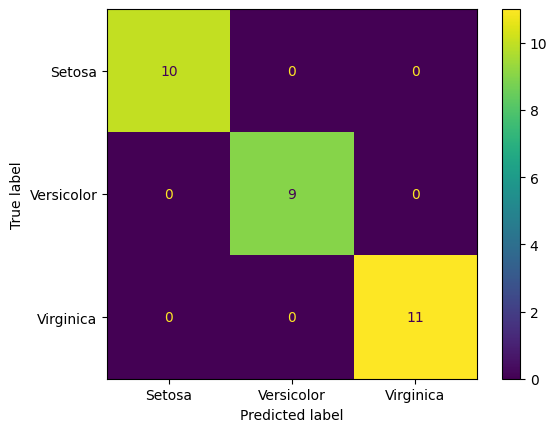

In [ ]:
#logistic_regression_multiclass
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

from google.colab import files
# Upload the CSV file
uploaded = files.upload()
# Read the CSV file into a pandas DataFrame
iris = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(iris.head())


X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

Saving HR_comma_sep.csv to HR_comma_sep (1).csv
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      

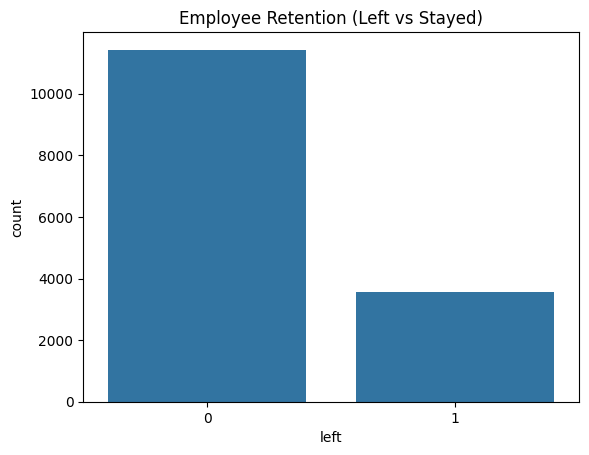

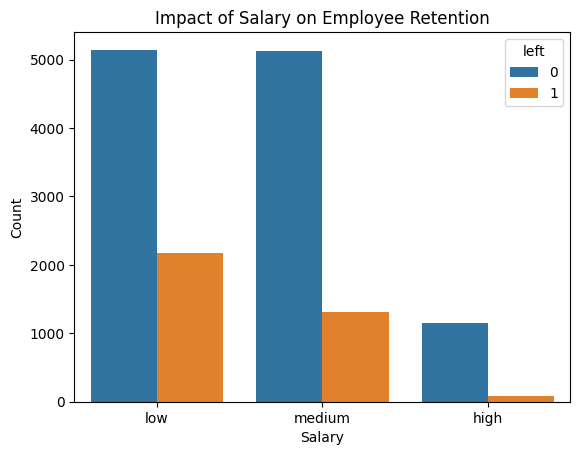

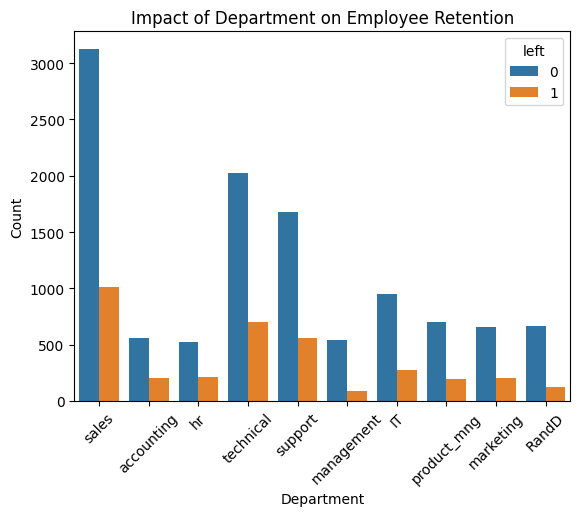

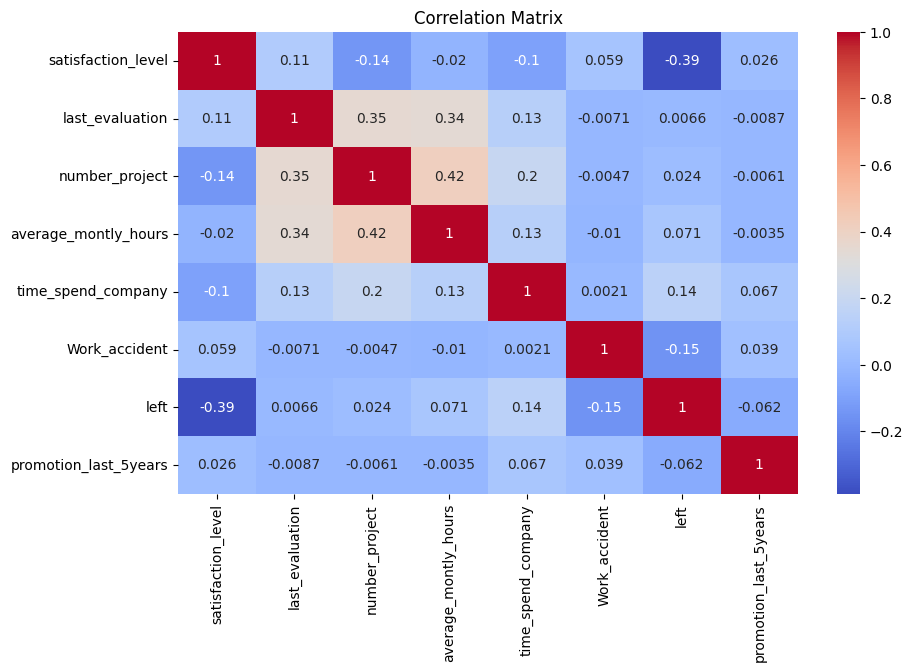


Accuracy of the Logistic Regression Model: 0.78


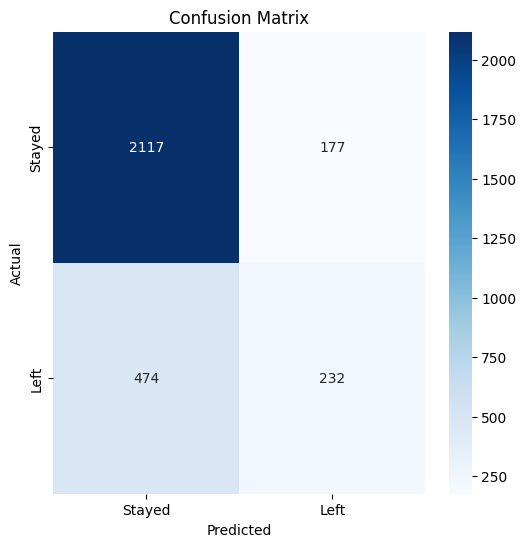

In [ ]:
#hr_comma_sep
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(df.head())

# Step 1: Exploratory Data Analysis (EDA)

# 1.1: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# 1.2: Basic statistics of numerical variables
print("\nBasic Statistics:\n", df.describe())

# 1.3: Checking the distribution of the target variable 'left' (employee retention)
sns.countplot(x='left', data=df)
plt.title('Employee Retention (Left vs Stayed)')
plt.show()

# Step 2: Visualizations to explore relationships with retention

# 2.1: Impact of salary on retention
sns.countplot(x='salary', hue='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# 2.2: Impact of department on retention
sns.countplot(x='Department', hue='left', data=df)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 3: Correlation Matrix (only for numeric columns)
numeric_df = df.select_dtypes(include=['number'])  # exclude non-numeric columns
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 4: Preparing the data for Logistic Regression

# 4.1: Encode categorical variables (salary, department)
df = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)

# Features (X) and target (y)
X = df.drop(columns=['left'])
y = df['left']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Predicting and Evaluating the Model
y_pred = model.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy of the Logistic Regression Model: {accuracy:.2f}')

# Confusion Matrix to evaluate model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Please upload zoo-data.csv


Saving zoo-data.csv to zoo-data (2).csv
Please upload zoo-class_type.csv


Saving zoo-class-type.csv to zoo-class-type (2).csv

Zoo Data Sample:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

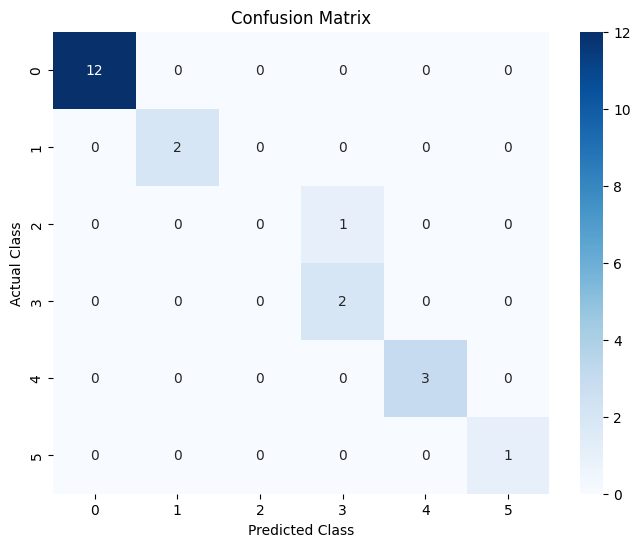

In [ ]:
#zoo_dataset
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

from google.colab import files

# Step 1: Upload both datasets
print("Please upload zoo-data.csv")
uploaded = files.upload()
zoo_df = pd.read_csv(next(iter(uploaded)))

print("Please upload zoo-class_type.csv")
uploaded = files.upload()
class_info_df = pd.read_csv(next(iter(uploaded)))

# Step 2: Data inspection
print("\nZoo Data Sample:")
print(zoo_df.head())

print("\nClass Type Data Sample:")
print(class_info_df.head())

# Step 3: Drop 'animal_name' as it's a label, not a feature
zoo_df = zoo_df.drop(columns=['animal_name'])

# Step 4: Features and target
X = zoo_df.drop(columns=['class_type'])
y = zoo_df['class_type']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Confusion Matrix (Fixed version)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')
plt.show()
